# 3장 : 신경망

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

신경망을 그림으로 나타내면 [그림 3-1]처럼 된다. 여기에서 가장 왼쪽 줄을 $\textbf{입력층}$, 맨 오른쪽 줄을 $\textbf{출력층}$, 중간 줄을 $\textbf{은닉층}$이라고 한다. 이 책에서는 입력층에서 출력층 방향으로 차례로 0층,1층,2층이라고 정의하도록 한다.(층 번호를 0부터 시작하는 이유는 파이썬 배열의 인덱스도 0부터 시작하여, 나중에 구현할때 짝짓기 편하기 때문이다.)

#### [그림3-1] : 본문 64페이지 참조

### 3.1.2 퍼셉트론 복습

#### [그림3-2] : 본문 참조

[그림3-2]는 $x_1$과 $x_2$라는 두 신호를 입력받아 $y$를 출력하는 퍼셉트론이다. 이 퍼셉트론을 수식으로 나타내면 다음과 같다:

\begin{equation}
    y =
    \begin{cases}
        0 ~~~(b+ w_{1}x_1 + w_2 x_2 \leq 0) \\
        1 ~~~(b+ w_{1}x_1 + w_2 x_2 > 0)
    \end{cases}
\end{equation} \tag{3.1}

여기서 $b$는 $\textbf{편향}$을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다. 한편, $w_1$과 $w_2$는 각 신호의 $\textbf{가중치}$를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

그런데 [그림3-2]의 네트워크에는 편향 $b$가 보이지 않는다. 여기에 편향을 명시한다면 [그림3-3]과 같이 나태낼 수 있다.

#### [그림3-3]

[그림3-3]에서는 가중치가 $b$이고 입력이 1인 뉴런이 추가되었따. 이 퍼셉트론의 동작은 $x_1,x_2,1$이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다. 다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다. 참고로, 편향의 입력신호는 항상 1이기 때문에 그림에서는 해당 뉴런을 회색으로 채워 다른 뉴런과 구별하였다.

식(3.1)을 더 간결한 형태로 작성해보록 한다. 이를 위해서 조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)을 하나의 함수로 나타내도록 하자. 이 함수를 $h(x)$라고 하면 식(3.1)을 다음과 같이 식(3.2)와 식(3.3) 으로 표현할 수 있다.

\begin{equation}
    y = h(b+w_1 x_1 + w_2 x_2)
\end{equation} \tag{3.2}

\begin{equation}
    y = 
    \begin{cases}
        0~~~(x \leq 0) \\
        1~~~(x > 0)
    \end{cases}
\end{equation} \tag{3.3}

### 3.1.3 활성화 함수의 등장

조금 전 $h(x)$라는 함수가 등장했는데, 이처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 $\textbf{활성화 함수}^{\text{activation function}}$이라 한다. '활성화' 라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

식 (3.2)를 다시 써보자. 식 (3.2)는 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다. 따라서 이 식은 다음과 같은 2개의 식으로 표현될 수 있다.

\begin{equation}
    a = b + w_1 x_1 + w_2 x_2
\end{equation} \tag{3.4}

\begin{equation}
    y = h(a)
\end{equation} \tag{3.5}

식 (3.4)는 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 $a$라고 한다. 그리고 식 (3.5)는 $a$를 함수 $h()$에 넣어 $y$를 출력하는 흐름과 같다.

지금까지와 같이 뉴런을 큰 원($\circ$) 으로 그려보면 식 (3.4)와 식 (3.5)는 [그림3-4]처럼 나타낼 수 있다.

#### [그림3-4]

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수

### 3.2.2 계단 함수 구현하기

In [3]:
import numpy as np

In [4]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [5]:
def step_function(x):
    y = x > 0
    return y.astype(int)

In [6]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [7]:
y = x > 0
y

array([False,  True,  True])

In [9]:
y = y.astype(int)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

In [12]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/160.8 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ - 153.6/160.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 6.1 MB/s eta 0:00:02
   - -------------------------------------- 0.4/7.6 MB 4.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.6 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.6 MB 8.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.6 MB 11.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.6/7.6 MB 13.7 MB/s eta 0:00:01
   -----

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

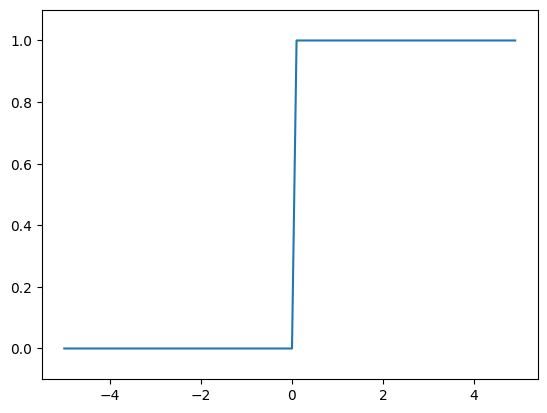

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [17]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t


array([2., 3., 4.])

In [18]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

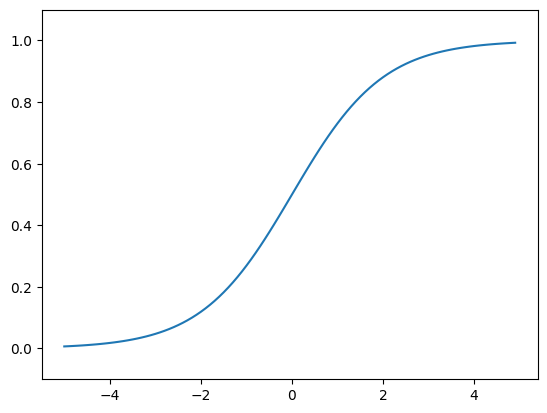

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

### 3.2.6 비선형 함수

### 3.2.7 ReLU 함수

In [3]:
def relu(x):
    return np.maximum(0, x)

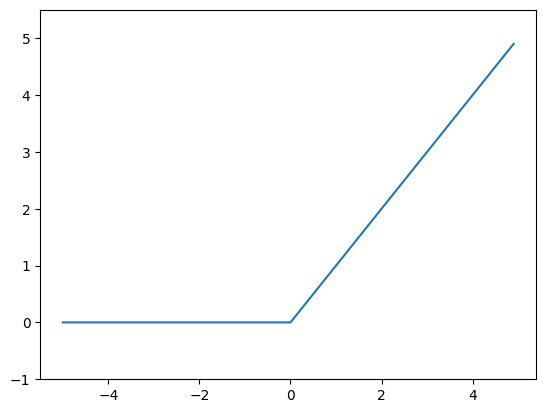

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [22]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [23]:
np.ndim(A)

1

In [24]:
A.shape

(4,)

In [25]:
A.shape[0]

4

In [26]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [28]:
np.ndim(B)

2

In [29]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

In [30]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [31]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [35]:
A * B # 원소 곱 (elementwise product)

array([[ 5, 12],
       [21, 32]])

In [36]:
np.dot(A, B) # 행렬의 곱 (matrix product)

array([[19, 22],
       [43, 50]])

In [38]:
A = np.array([[1,2,3] , [4,5,6]])
A.shape

(2, 3)

In [40]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [41]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [42]:
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [43]:
A.shape

(2, 3)

In [44]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [45]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [46]:
B = np.array([7,8])
B.shape

(2,)

In [47]:
np.dot(A, B)

array([23, 53, 83])

### 신경망에서의 행렬 곱

In [48]:
X = np.array([1, 2])
X.shape

(2,)

In [49]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [50]:
W.shape

(2, 3)

In [51]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [54]:
Y = np.dot(W.T, X)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명

### 3.4.2 각 층의 신호 전달 구현하기

In [4]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(W1.T, X) + B1

(2, 3)
(2,)
(3,)


In [5]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [7]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(W2.T, Z1) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)


(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [8]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(W3.T, Z2) + B3
Y = identity_function(A3)   # 혹은 Y = A3